In [1]:
nome = 'Mochi'
nome

'Mochi'

In [2]:
idade = 30
idade

30

In [3]:
idade = 38

# Analisando as notas em geral

In [4]:
import pandas as pd
notas = pd.read_csv("data/ratings.csv")

In [5]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
notas.shape

(100836, 4)

In [7]:
notas.columns = ["usuarioID", "filmeID", "nota", "momento"]

In [8]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [9]:
notas['nota'].value_counts()

nota
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [10]:
notas['nota'].mean()

3.501556983616962

<Axes: ylabel='Frequency'>

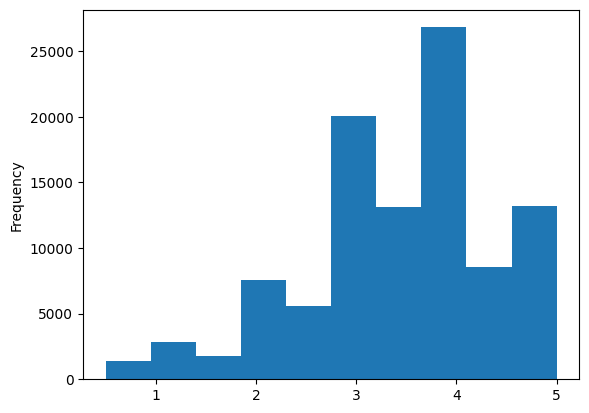

In [11]:
notas.nota.plot(kind = 'hist')

In [12]:
print("Média", notas['nota'].mean())
print("Mediana", notas['nota'].median())

Média 3.501556983616962
Mediana 3.5


In [13]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

In [14]:
import seaborn as sns

<Axes: xlabel='nota'>

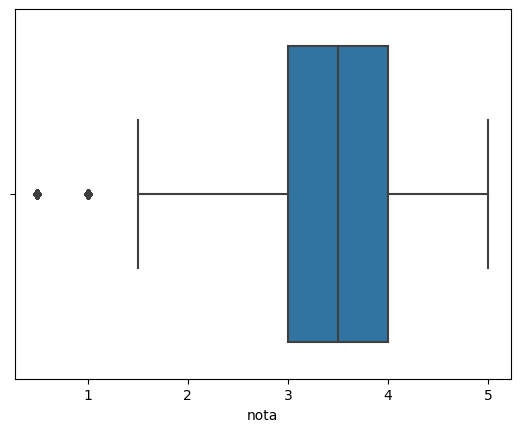

In [15]:
sns.boxplot(x = notas.nota)

# Analisando os Filmes

In [16]:
filmes = pd.read_csv("data/movies.csv")

In [17]:
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Analisando as notas específicas por filmes

In [18]:
filmes.columns = ["filmeID","Título","Gênero"]

In [19]:
notas.query("filmeID == 1").nota.mean()

3.9209302325581397

In [20]:
notasFilme = notas.groupby("filmeID").mean()["nota"]

In [21]:
notasFilme.head()

filmeID
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<Axes: ylabel='Frequency'>

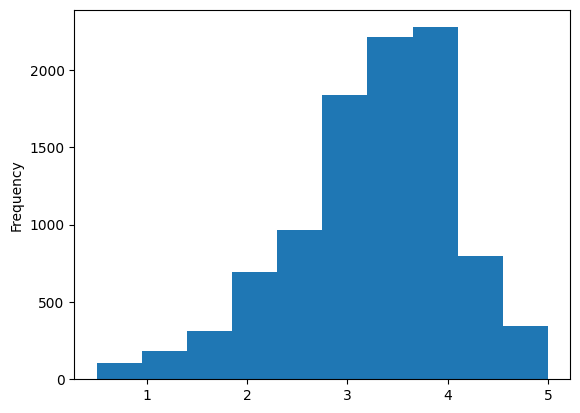

In [22]:
notasFilme.plot(kind = "hist")

<Axes: xlabel='nota'>

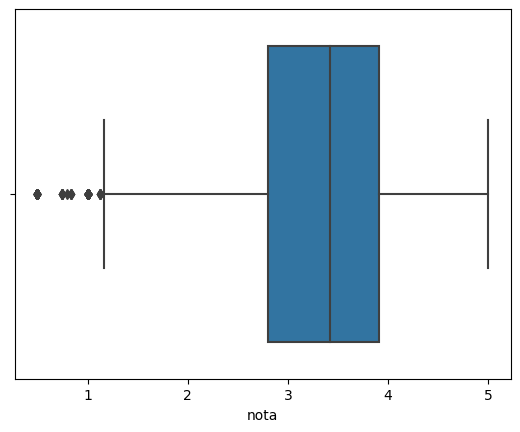

In [23]:
sns.boxplot(x= notasFilme)

In [24]:
notasFilme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

<Axes: xlabel='nota', ylabel='Count'>

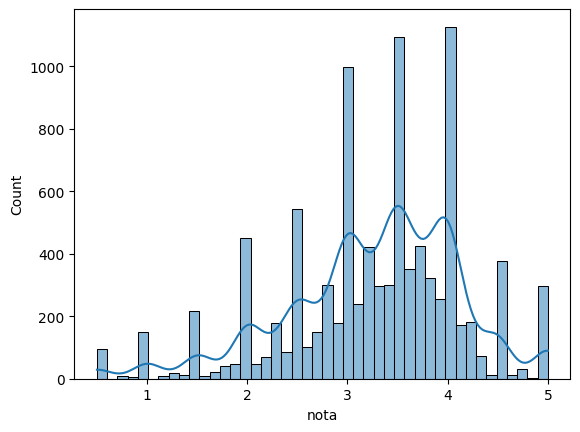

In [25]:
sns.histplot(notasFilme, kde=True)

<Axes: xlabel='nota', ylabel='Count'>

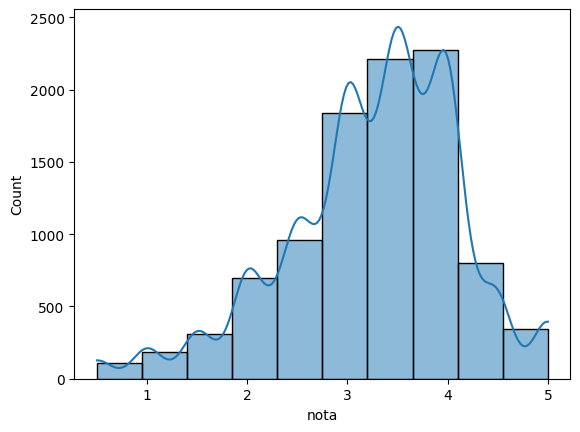

In [26]:
sns.histplot(notasFilme, kde = True, bins = 10)

In [27]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Histograma das médias dos filmes')

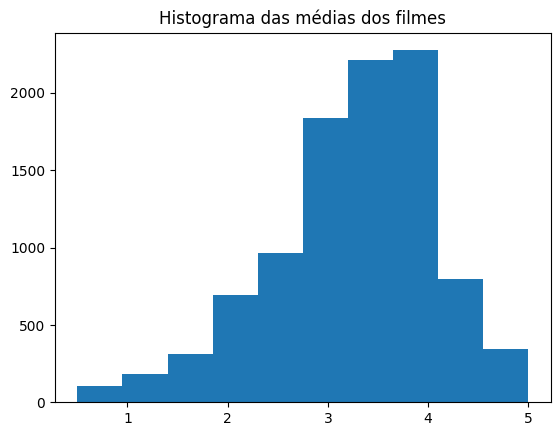

In [28]:
plt.hist(notasFilme)
plt.title("Histograma das médias dos filmes")

<Axes: ylabel='nota'>

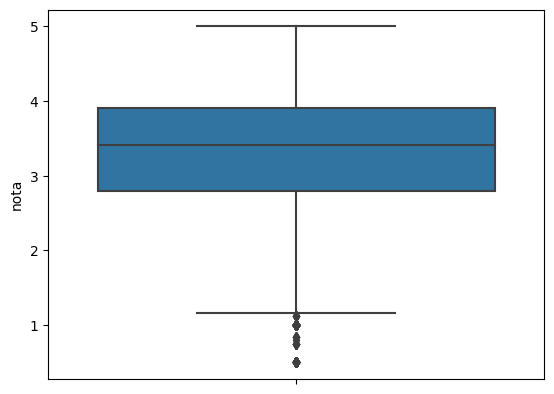

In [29]:
sns.boxplot(y = notasFilme)

<Axes: ylabel='nota'>

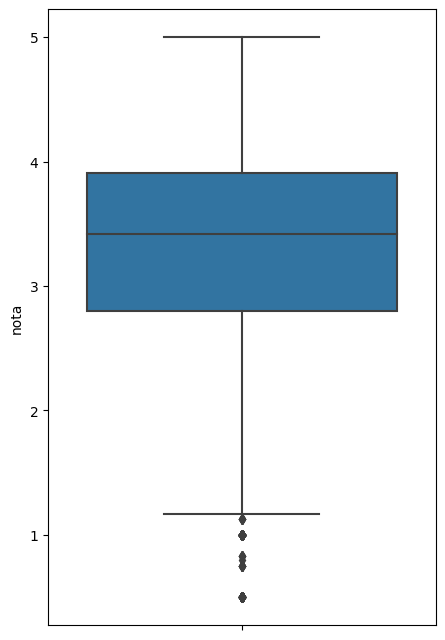

In [30]:
plt.figure(figsize = (5,8))
sns.boxplot(y = notasFilme)

In [31]:
import pandas as pd

In [32]:
tmdb = pd.read_csv('data/tmdb_5000_movies.csv')

In [33]:
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [34]:
tmdbLinhas = tmdb.original_language.value_counts().to_frame().reset_index()

In [35]:
tmdbLinhas.columns = ["original_language", "total"]

In [36]:
tmdbLinhas.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<Axes: xlabel='original_language', ylabel='total'>

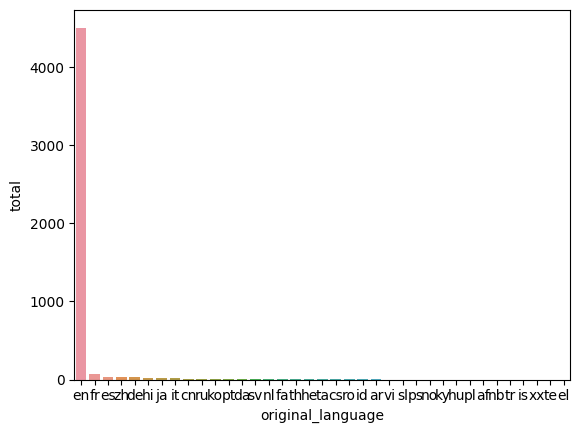

In [40]:
sns.barplot(x = "original_language", y = "total", data = tmdbLinhas)

/Users/jaquelinerufino/Documents/GitHub/aluraDataScience/alurads/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


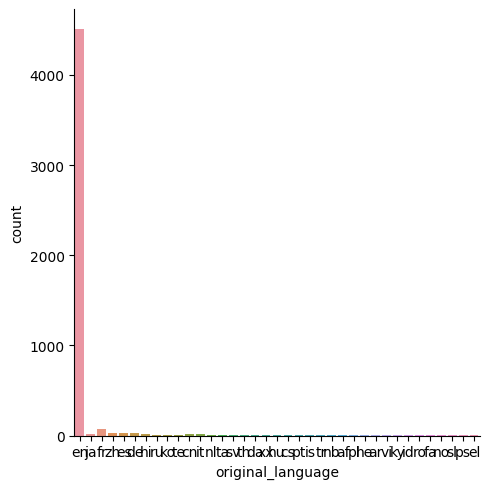

In [42]:
sns.catplot(x="original_language", kind="count", data=tmdb)

([<matplotlib.patches.Wedge at 0x138813b50>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text(1.

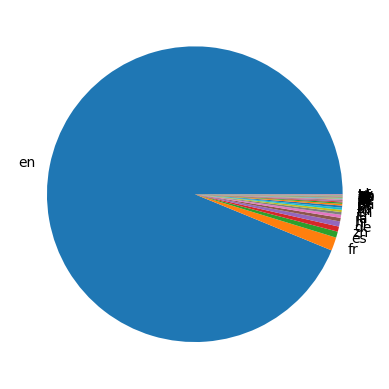

In [43]:
plt.pie(tmdbLinhas["total"], labels=tmdbLinhas["original_language"])

In [44]:
totalLinhas = tmdb["original_language"].value_counts()

In [45]:
totalLinhas["en"]

4505

In [46]:
totalGeral = totalLinhas.sum()

In [47]:
totalIngles = totalLinhas.loc["en"]

In [48]:
totalResto = totalGeral - totalIngles

In [49]:
print(totalIngles, totalResto)

4505 298


In [50]:
dados = { 'lingua' : ['ingles','outros'], 'total' : [totalIngles, totalResto]}

In [52]:
dados = pd.DataFrame(dados)

In [53]:
dados

,lingua,total
0,ingles,4505
1,outros,298


<Axes: xlabel='lingua', ylabel='total'>

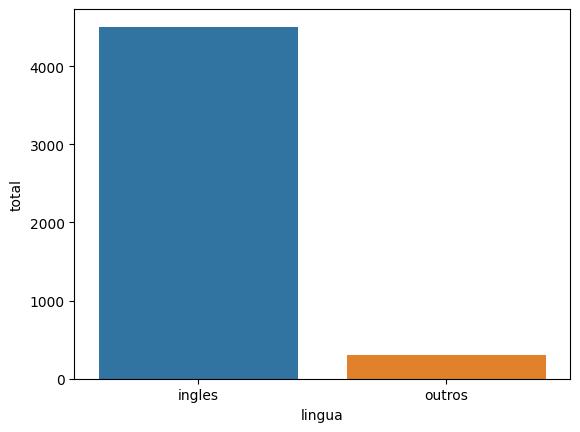

In [54]:
sns.barplot(data = dados, x = 'lingua', y = 'total')

([<matplotlib.patches.Wedge at 0x1389e09d0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

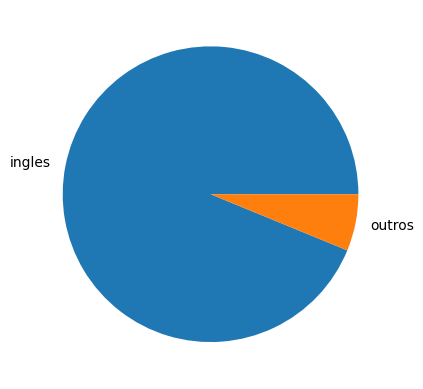

In [55]:
plt.pie(dados["total"], labels=dados["lingua"])

In [65]:
totlinhasOutrasLinguas = tmdb.query("original_language != 'en'").original_language.value_counts()

In [66]:
filmesoutraslinguas = tmdb.query("original_language != 'en'")

/Users/jaquelinerufino/Documents/GitHub/aluraDataScience/alurads/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


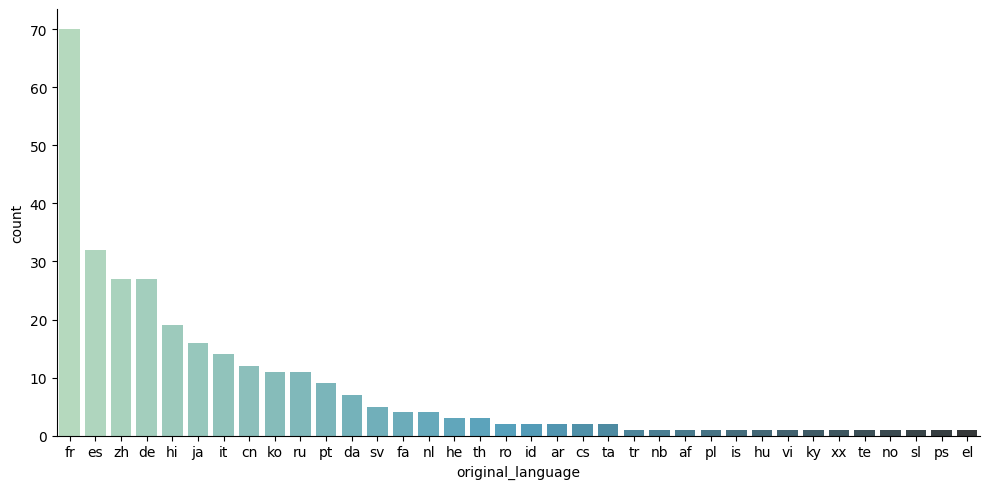

In [73]:
sns.catplot(x = "original_language", data=filmesoutraslinguas, kind="count", aspect=2, order=totlinhasOutrasLinguas.index, palette="GnBu_d")

In [68]:
plt.figure(figsize=(5,10))

<Figure size 500x1000 with 0 Axes>

<Figure size 500x1000 with 0 Axes>

In [75]:
filmes

,filmeID,Título,Gênero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [76]:
notasToyStory = notas.query("filmeID == 1")

In [78]:
notasJumanji = notas.query("filmeID == 2")

In [79]:
print(len(notasToyStory), len(notasJumanji))

215 110


In [81]:
print("Nota média do Toy Story %.2f" % notasToyStory.nota.mean())
print("Nota média do Jumanji %.2f" % notasJumanji.nota.mean())

Nota média do Toy Story 3.92
Nota média do Jumanji 3.43


In [82]:
print("Nota mediana do Toy Story %.2f" % notasToyStory.nota.median())
print("Nota mediana do Jumanji %.2f" % notasJumanji.nota.median())

Nota mediana do Toy Story 4.00
Nota mediana do Jumanji 3.50


In [83]:
import numpy as np

In [85]:
np.array([2.5] * 10).mean()

2.5

In [86]:
ToyStory = np.append(np.array([2.5] * 10), np.array([3.5] * 10))

In [88]:
Jumanji = np.append(np.array([5] * 10), np.array([1] * 10))

In [89]:
print(ToyStory.mean(), Jumanji.mean())

3.0 3.0


In [90]:
print(np.median(ToyStory), np.median(Jumanji) )

3.0 3.0


(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

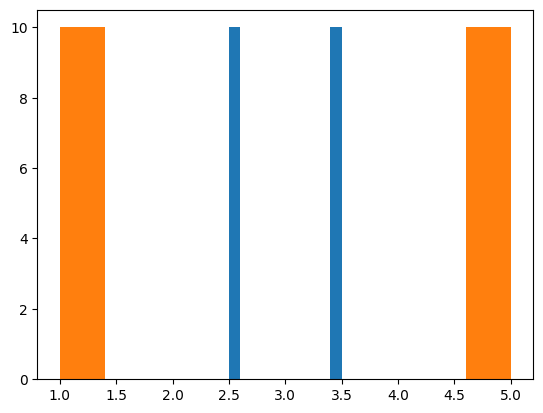

In [92]:
plt.hist(ToyStory)
plt.hist(Jumanji)

{'whiskers': [<matplotlib.lines.Line2D at 0x13e9ea7d0>,
 'caps': [<matplotlib.lines.Line2D at 0x13e9eb5d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x13e9e8590>,
 'medians': [<matplotlib.lines.Line2D at 0x13e9fcad0>,
 'fliers': [<matplotlib.lines.Line2D at 0x13e9fd350>,
 'means': []}

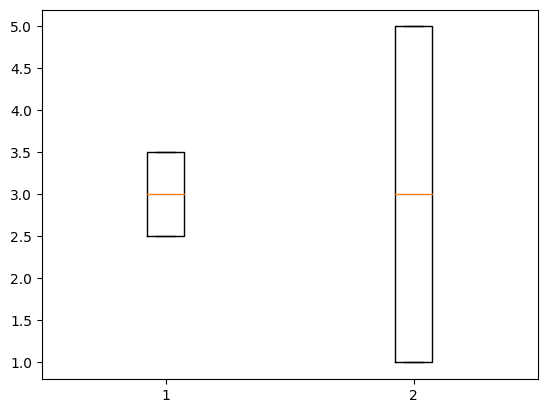

In [91]:
plt.boxplot([ToyStory, Jumanji])

{'whiskers': [<matplotlib.lines.Line2D at 0x1490b0dd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1490b1fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1490b0610>,
 'medians': [<matplotlib.lines.Line2D at 0x1490b3050>,
 'fliers': [<matplotlib.lines.Line2D at 0x13eb5fa50>,
 'means': []}

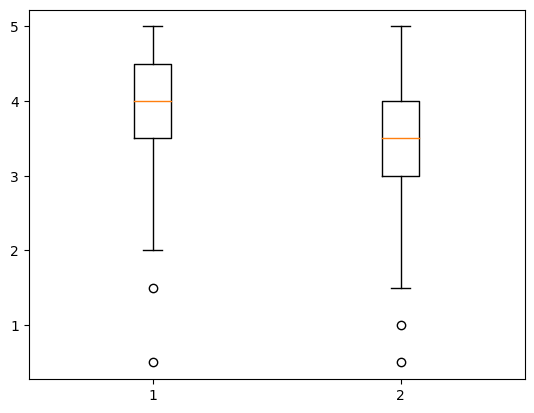

In [95]:
plt.boxplot([notasToyStory.nota, notasJumanji.nota])

<Axes: xlabel='filmeID', ylabel='nota'>

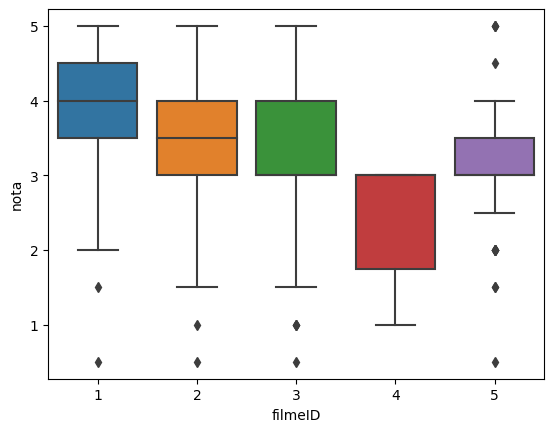

In [97]:
sns.boxplot(x="filmeID", y="nota", data=notas.query("filmeID in (1,2,3,4,5)"))

In [98]:
print("Desvio padrão do Jumanji %.2f\n" % notasJumanji.nota.std(), "Desvio padrão do Toy Story %.2f" % notasToyStory.nota.std())

Desvio padrão do Jumanji 0.88
 Desvio padrão do Toy Story 0.83


In [99]:
print(np.mean(ToyStory), np.mean(Jumanji))
print(np.std(ToyStory), np.std(Jumanji))
print(np.median(ToyStory), np.median(Jumanji))

3.0 3.0
0.5 2.0
3.0 3.0
